In [1]:
import pandas as pd

df = pd.read_csv('test3_modify.csv')

In [2]:
label = 'Churn_num'
features = ['SeniorCitizen', 'TotalCharges', 'tenure_scaled',
       'MonthlyCharges_scaled', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed']

X, y= df[features], df[label]

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(X)
kmeans.labels_

array([2, 0, 2, ..., 2, 2, 1])

In [4]:
df['cluster'] = kmeans.labels_

In [5]:
df.head()

,SeniorCitizen,TotalCharges,Churn_num,tenure_scaled,MonthlyCharges_scaled,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed,cluster
0,0,29.85,0,0.013889,-1.160323,1,0,0,1,0.5,2
1,0,1889.50,0,0.472222,-0.259629,0,0,1,0,0.5,0
2,0,108.15,1,0.027778,-0.362660,0,0,1,1,0.5,2
3,0,1840.75,0,0.625000,-0.746535,0,0,0,0,0.5,0
4,0,151.65,1,0.027778,0.197365,0,0,1,1,1.0,2


In [6]:
import numpy as np

df.groupby('cluster').agg({label : np.mean})

,Churn_num
cluster,
0,0.225750
1,0.131365
2,0.361783
3,0.180328


In [7]:
np.mean(df[label])

# 전체 고객 중 26% 이탈을 하는데
# 어떤 그룹은 평균 대비 2배 정도 이탈률이 높거나 낮다. 

0.2653698707936959

In [8]:
# 이탈률이 가장 높은 그룹과 낮은 그룹의 특징을 확인

import seaborn as sns

feature = [ 'SeniorCitizen', 'tenure_scaled',
       'MonthlyCharges_scaled', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed']

df1 = df.loc[df['cluster'] == 3][feature].describe().T['mean'].reset_index()
# 현상태로 하면 totalcharges의 값이 너무 커서 그래프가 이상하게 나온다. 그래서 total charges를 뺴주거나 scaling을 진행 후에 
# 시각화를 해줘야한다. 

<AxesSubplot:xlabel='mean', ylabel='index'>

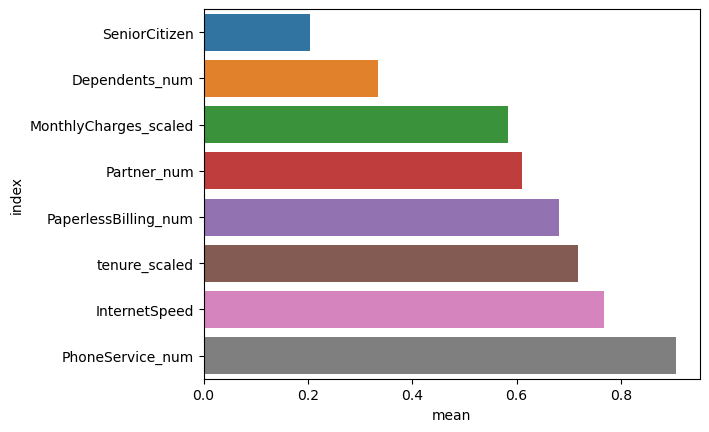

In [9]:
sns.barplot(data = df1.sort_values(by = 'mean'), x= 'mean', y ='index')

In [10]:
df2 = df.loc[df['cluster'] == 0][feature].describe().T['mean'].reset_index()

<AxesSubplot:xlabel='mean', ylabel='index'>

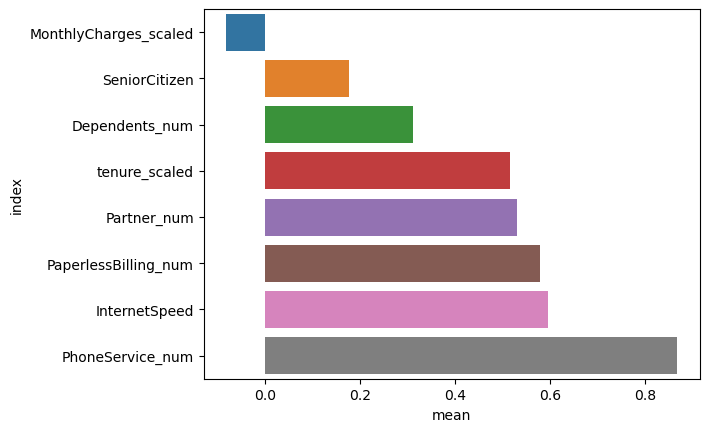

In [11]:
sns.barplot(data = df2.sort_values(by = 'mean'), x= 'mean', y ='index')

### 그룹화 할 때, 군집의 개수를 지정하는 방법
- 군집의 개수를 미리 알고있는 경우 - 그대로 사용
- 실루엣 지표 - 범위가 -1에서 1사이의 값을 가진다. 1에 가까울수록 좋다.
- scree plot, elbow method

In [12]:
from sklearn.metrics import silhouette_score as sil

In [13]:
model = KMeans(n_clusters = 3)
model.fit(df[feature])

KMeans(n_clusters=3)

In [14]:
sil_score = sil(df[feature], model.labels_)
sil_score

0.26924896878322424

In [15]:
model = KMeans(n_clusters = 4)
model.fit(df[feature])

sil_score = sil(df[feature], model.labels_)
# model.inertia_ -> elbow score
sil_score

0.24036014595630825

In [17]:
model = KMeans(n_clusters = 5)
model.fit(df[feature])

sil_score = sil(df[feature], model.labels_)
sil_score

0.2468145022745789

In [20]:
score_list = []

for i in range(10):
    i += 2
    model = KMeans(n_clusters = i)
    model.fit(df[feature])

    sil_score = sil(df[feature], model.labels_)
    elbow_score = model.inertia_
    score_list.append({'num_cluster' : i, 'sil' : sil_score, 'elbow' : elbow_score})
score_df = pd.DataFrame(score_list)

In [21]:
score_df

,num_cluster,sil,elbow
0,2,0.357751,8937.277740
1,3,0.269249,7657.454442
2,4,0.240286,6686.918914
3,5,0.244665,6134.730542
4,6,0.254413,5522.984444
5,7,0.263957,5108.441091
6,8,0.267232,4698.752509
7,9,0.273713,4438.187162
8,10,0.286089,4098.069182
9,11,0.288156,3910.390582


<AxesSubplot:xlabel='num_cluster', ylabel='elbow'>

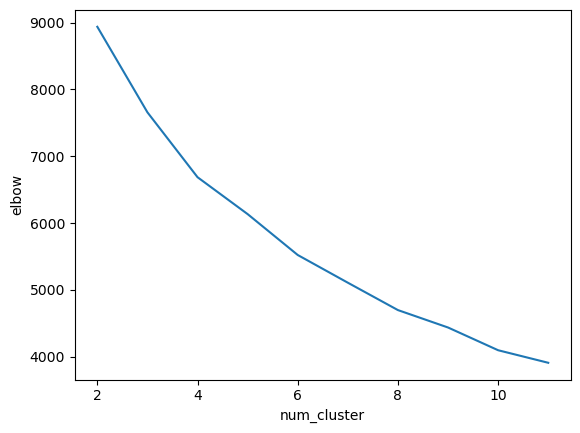

In [22]:
sns.lineplot(data = score_df, x= 'num_cluster', y = 'elbow')

### 차원 축소 ( Dimensionality Reduction ) 
- 주성분분석 ( PCA ) 

In [23]:
from sklearn.decomposition import PCA

In [24]:
len(feature)

8

In [26]:
model = PCA(n_components= 2)
pd.DataFrame(model.fit_transform(df[feature]), columns = ['PC1', 'PC2'])

,PC1,PC2
0,-1.077752,-0.018679
1,-0.399133,-0.428201
2,-0.330653,-0.695921
3,-0.895657,-0.425295
4,0.344060,-0.706090
...,...,...
7038,0.613580,0.761369
7039,1.385085,0.932505
7040,-1.135765,0.611955
7041,0.592569,-0.054337


In [29]:
pd.DataFrame(model.components_, columns = feature)

# PC1 = 0.089376 * SeniorCitizen + 0.074786 * tenure_scaled + .... 

,SeniorCitizen,tenure_scaled,MonthlyCharges_scaled,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
0,0.089376,0.074786,0.911090,0.045016,-0.06083,0.064334,0.195589,0.328958
1,-0.094996,0.268353,0.046648,0.733558,0.59375,0.015379,-0.143646,-0.072585


### PCA 수학적 설명
- column 끼리 공분산을 구해서 공분산 행렬을 구함 ex)df[].cov()
- 고유값, 고유벡터를 정방행렬에서 뽑아낼 수 있음
- 고유값의 크기 순으로 정렬
- 크기가 가장 큰 고유값부터 정렬하면 순서를 갖음
- 고유값과 고유벡터는 한 쌍으로 되어있다.
- 고유벡터 크기가 큰 것부터 작은 것 순서대로 PC1, PC2... 으로 이름을 붙임 

In [ ]:
import matplotlib.pyplt